In [233]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.cluster.hierarchy import dendrogram, linkage
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures

from sklearn.decomposition import PCA

In [130]:
data_origin=pd.read_excel('dataset2.xlsx')

In [131]:
data=pd.read_csv('Data_final_encuestas_f2.csv')

In [132]:
data

,Unnamed: 0,nocues,nhog,miembro,f_calib3,region,aglo,t_aglo,estrato_U,cod_U,...,v210a_9.0,v210a_3.0,v210a_1.0,v210a_7.0,v210a_8.0,ITLi_d_9.0,ITLi_d_2.0,ITLi_d_3.0,ITLi_d_1.0,ITLi_d_4.0
0,0,1.0,1.0,1.0,778.0,3.0,6.0,4.0,164.0,682.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,2.0,778.0,3.0,6.0,4.0,164.0,682.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.0,1.0,3.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,4.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1.0,1.0,5.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27600,27605,8307.0,1.0,6.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27601,27606,8307.0,1.0,7.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27602,27607,8307.0,1.0,8.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27603,27608,8308.0,1.0,1.0,546.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
data.describe()

,Unnamed: 0,nocues,nhog,miembro,f_calib3,region,aglo,t_aglo,estrato_U,cod_U,...,v210a_9.0,v210a_3.0,v210a_1.0,v210a_7.0,v210a_8.0,ITLi_d_9.0,ITLi_d_2.0,ITLi_d_3.0,ITLi_d_1.0,ITLi_d_4.0
count,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,...,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000
mean,13803.171925,4064.496504,1.031987,2.673030,1356.940446,4.567832,4.841188,1.862996,145.345590,540.708277,...,0.694765,0.106792,0.105705,0.044412,0.026517,0.644376,0.046658,0.044412,0.042311,0.039775
std,7970.339939,2396.117955,0.199510,1.694078,1516.431742,2.197354,1.742891,1.071962,75.144421,258.655086,...,0.460515,0.308855,0.307466,0.206013,0.160670,0.478711,0.210910,0.206013,0.201302,0.195435
min,0.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6901.000000,1965.000000,1.000000,1.000000,540.000000,3.000000,4.000000,1.000000,83.000000,335.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13802.000000,4029.000000,1.000000,2.000000,895.000000,5.000000,6.000000,1.000000,145.000000,559.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,20705.000000,6140.000000,1.000000,4.000000,1567.000000,7.000000,6.000000,3.000000,215.000000,760.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,27609.000000,8308.000000,5.000000,17.000000,27258.000000,8.000000,6.000000,4.000000,268.000000,984.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
vars_general=['Unnamed: 0','nocues', 'nhog', 'miembro', 'f_calib3', 'region', 'aglo', 't_aglo','estrato_U', 'cod_U']

vars_cat_men_3=['v215a_1.0', 'v215a_9.0', 'v216a_1.0', 'v216a_9.0', 'v217a_1.0','v217a_9.0', 'v114_2.0', 'v114_9.0', 'v117_2.0', 'v117_9.0', 'v122_2.0',
       'v122_9.0', 'v153_2.0', 'v153_9.0', 'v154_2.0', 'v154_9.0', 'v155_2.0','v155_9.0', 'v156_2.0', 'v156_9.0', 'v157_2.0', 'v157_9.0', 'v158_2.0',
       'v158_9.0', 'v159_2.0', 'v159_9.0', 'v161_2.0', 'v161_9.0', 'v162_2.0', 'v162_9.0', 'v171_2.0', 'v171_9.0', 'v145_2.0', 'v145_9.0', 'v160_2.0',
       'v160_9.0', 'v172_2.0', 'v172_9.0', 'v173_2.0', 'v173_9.0', 'v186_2.0','v186_9.0', 'v204_2.0', 'v204_9.0', 'v207_2.0', 'v207_9.0', 'v214a_1.0',
       'v214a_9.0', 'v124_2.0', 'v124_9.0', 'v180_2.0', 'v180_9.0', 'v213a_9.0']
var_num=['v213bi', 'v214bi', 'v215bi', 'v216bi', 'v217bi', 'v163', 'v182caes', 'v183ciuo', 'v183cno', 'ITI', 'v213b', 'ITLi','v108','t_hogar']

var_sin_na=['v109', 'v110', 'v111', 'c_hogar', 'nivel_ed', 'v134a', 'v135', 'v139', 'v141', 'v142', 'v164', 'estado']

In [7]:
var_cat_may_3=data.drop(columns=vars_general+vars_cat_men_3+var_num+var_sin_na).columns


In [140]:
var_cat_may_3

Index(['v116_1.0', 'v116_2.0', 'v116_4.0', 'v116_3.0', 'v116_9.0', 'v140_1.0',
       'v140_2.0', 'v140_3.0', 'v140_9.0', 'v140_4.0',
       ...
       'v210a_9.0', 'v210a_3.0', 'v210a_1.0', 'v210a_7.0', 'v210a_8.0',
       'ITLi_d_9.0', 'ITLi_d_2.0', 'ITLi_d_3.0', 'ITLi_d_1.0', 'ITLi_d_4.0'],
      dtype='object', length=233)

In [8]:
print(len(vars_general))
print(len(var_sin_na))
print(len(var_num))
print(len(vars_cat_men_3))
print(len(var_cat_may_3))
print(len(vars_general)+len(vars_cat_men_3)+len(var_num)+len(var_sin_na)+len(var_cat_may_3))

10
12
14
53
233
322


In [138]:
data_origin['v116'].value_counts()

1.0    16563
2.0     7484
4.0     1364
3.0     1355
Name: v116, dtype: int64

## Duplicated features with Feature-engine

In [10]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
])

pipe.fit(data)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures())])

In [11]:
# remove features

data = pipe.transform(data)
data

,Unnamed: 0,nocues,nhog,miembro,f_calib3,region,aglo,t_aglo,estrato_U,cod_U,...,v210a_9.0,v210a_3.0,v210a_1.0,v210a_7.0,v210a_8.0,ITLi_d_9.0,ITLi_d_2.0,ITLi_d_3.0,ITLi_d_1.0,ITLi_d_4.0
0,0,1.0,1.0,1.0,778.0,3.0,6.0,4.0,164.0,682.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,2.0,778.0,3.0,6.0,4.0,164.0,682.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.0,1.0,3.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,4.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1.0,1.0,5.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27600,27605,8307.0,1.0,6.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27601,27606,8307.0,1.0,7.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27602,27607,8307.0,1.0,8.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27603,27608,8308.0,1.0,1.0,546.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
len(pipe.named_steps['constant'].features_to_drop_)

12

In [13]:
len(pipe.named_steps['duplicated'].features_to_drop_)

12

In [14]:
322-298

24

In [15]:
pipe.named_steps['duplicated'].features_to_drop_

{'cat_ocup_9.0',
 'v119_9.0',
 'v153_9.0',
 'v154_9.0',
 'v155_9.0',
 'v156_9.0',
 'v157_9.0',
 'v158_9.0',
 'v161_9.0',
 'v162_9.0',
 'v169_9.0',
 'v209_9.0'}

In [145]:
data_cluster2=data[['v109','v108','v111','nivel_ed','ITI','ITLi','estado','v116_1.0', 'v116_2.0','v116_3.0','v152a_1.0','v152a_2.0','v152a_3.0']]

In [146]:
data_cluster2.describe()

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0
count,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000
mean,1.519978,33.287955,2.720196,4.001884,3723.802324,3047.910878,2.242384,0.599819,0.271110,0.049085,0.837312,0.038363,0.018402
std,0.500045,22.256161,1.988344,2.573031,5600.018618,5103.689357,1.175377,0.489944,0.444541,0.216050,0.369087,0.192074,0.134404
min,1.000000,0.000000,1.000000,0.000000,80.000000,90.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,15.000000,1.000000,2.000000,83.597534,103.491225,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,30.000000,3.000000,4.000000,1865.333333,689.440340,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,50.000000,3.000000,5.000000,5198.000000,4220.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,99.000000,12.000000,99.000000,104000.000000,84510.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Análisis exploratorio de datos

## v213bi Monto de ingreso neto en ocupación principal del mes pasado (imputado)  

In [18]:
data['v213bi'].value_counts().sort_index(ascending=False)

84510.000000        1
76059.000000        1
72679.000000        1
67608.000000        1
60000.000000        1
                ...  
106.000000          1
100.000000          8
98.368728           1
90.000000           1
0.000000        16790
Name: v213bi, Length: 576, dtype: int64

## v214bi  Monto de ingreso neto en otras ocupaciones del mes pasado (imputado)  

In [19]:
data['v214bi'].value_counts().sort_index(ascending=False)

25412.000000        1
20000.000000        1
18000.000000        2
17000.000000        1
16902.000000        1
                ...  
55.705384           1
33.660014           1
27.935442           1
24.915742           1
0.000000        27082
Name: v214bi, Length: 152, dtype: int64

## v215bi Monto de ingreso por jubilaciones o pensiones el mes pasado (imputado)  

In [20]:
data['v215bi'].value_counts().sort_index(ascending=False)

50706.0        1
46126.0        1
40565.0        1
35000.0        2
33804.0        4
           ...  
300.0          1
271.0          2
219.4          1
156.0          3
0.0        23763
Name: v215bi, Length: 426, dtype: int64

##  v216bi Monto de ingreso por pensiones sociales, AHU u otros planes sociales el mes pasado (imputado)  

In [21]:
data['v216bi'].value_counts().sort_index(ascending=False)

33804.0        1
30424.0        1
25353.0        1
16902.0        1
16000.0        5
           ...  
90.0           1
89.0           1
80.0           3
60.0           1
0.0        23332
Name: v216bi, Length: 312, dtype: int64

##  v217bi Monto de otros ingresos el mes pasado (imputado)   

In [22]:
data['v217bi'].value_counts().sort_index(ascending=False)

79000.0        2
30000.0        1
28000.0        1
24933.0        2
23102.0        3
           ...  
150.0          4
130.0          1
106.0          1
100.0          9
0.0        25989
Name: v217bi, Length: 240, dtype: int64

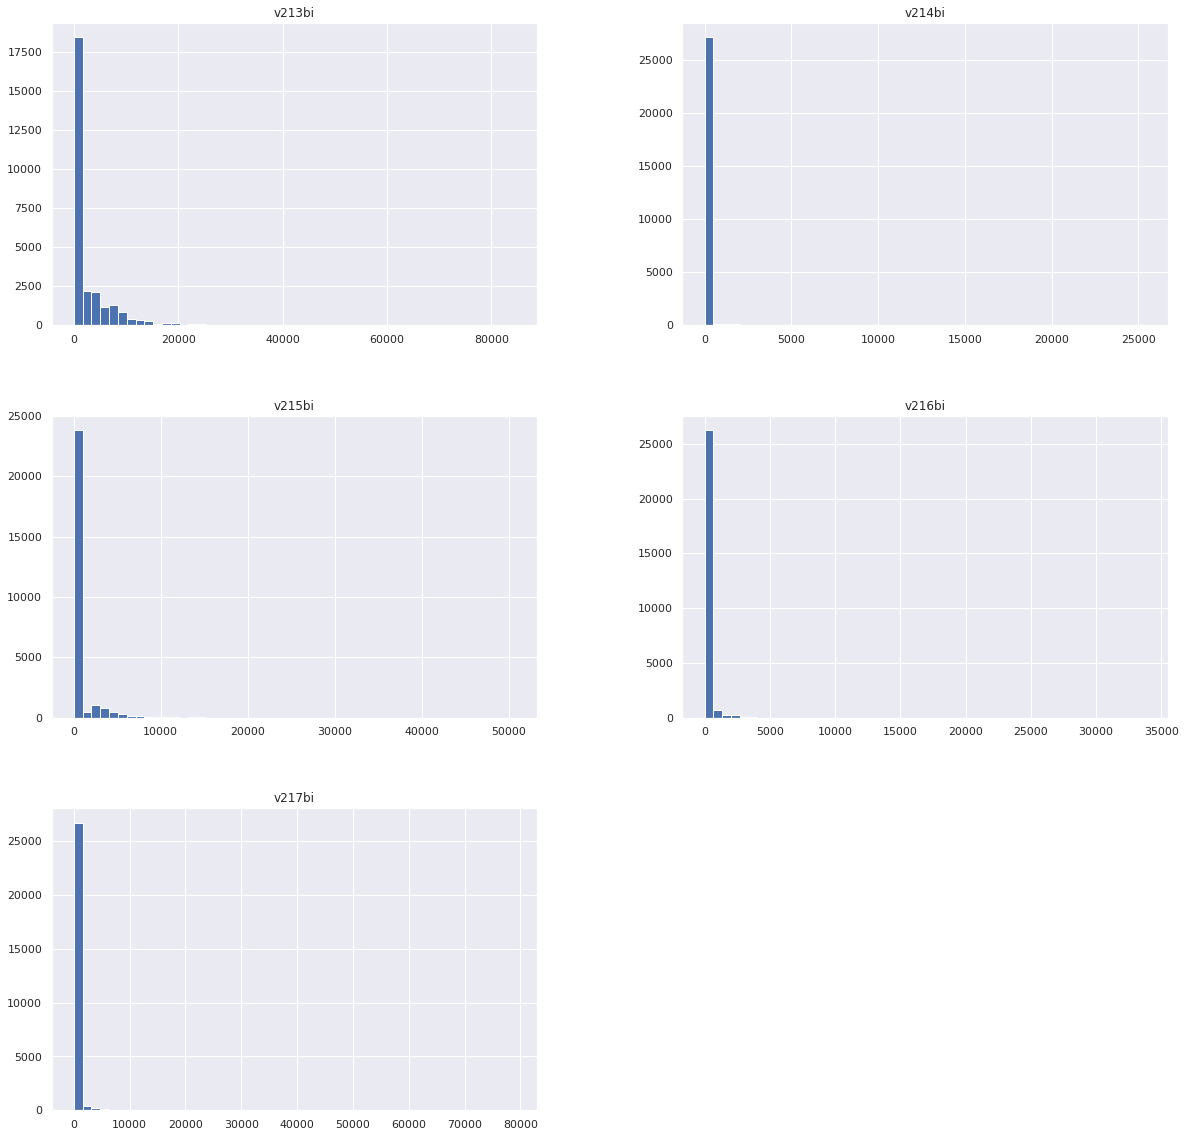

In [23]:
data[['v213bi','v214bi','v215bi','v216bi','v217bi']].hist(bins=50,figsize=(20,20));



## v163 Cantidad de horas dedicadas a las actividades de la casa mencionadas  

In [26]:
data['v163'].value_counts().sort_index(ascending=False)

96.000000       1
95.000000       1
94.000000       3
93.000000       1
92.000000       4
             ... 
1.455896        1
1.400000       18
1.000000     1411
0.060201        1
0.000000     4197
Name: v163, Length: 206, dtype: int64

## v182caes Código de Actividad Económica (CAES Mercosur 1.0)  

In [25]:
data['v182caes'].value_counts().sort_index(ascending=False)

9999.000000     545
9700.000000    1788
9618.964633       2
9614.585805       2
9609.000000      39
               ... 
104.000000       15
103.000000       38
102.000000       90
101.000000      350
100.000000        7
Name: v182caes, Length: 1023, dtype: int64

##  v183ciuo Tipo de ocupación (Clasificación Internacional Uniforme de Ocupaciones 2008)  

In [27]:
data['v183ciuo'].value_counts().sort_index(ascending=False)

9999.0    384
9629.0      8
9623.0      1
9622.0     28
9621.0    110
         ... 
1112.0     13
1111.0      1
310.0      33
210.0      10
110.0       5
Name: v183ciuo, Length: 1363, dtype: int64

## v183cno Tipo de ocupación (Clasificador Nacional de Ocupaciones 2001)  

In [28]:
data['v183cno'].value_counts().sort_index(ascending=False)

99999.0    405
92393.0      3
92392.0      5
92333.0      3
92332.0     17
          ... 
5002.0     532
5001.0     135
3001.0      80
2001.0       6
1001.0       3
Name: v183cno, Length: 1472, dtype: int64

## ITI Monto de ingreso total individual  

In [29]:
data['ITI'].value_counts().sort_index(ascending=False)

104000.000000       1
84510.000000        1
83665.000000        1
79000.000000        1
76059.000000        1
                 ... 
83.584259           8
83.580273          76
83.578016          14
83.546284        1221
80.000000           3
Name: ITI, Length: 2800, dtype: int64

## ITLi Monto de ingreso total laboral  

In [30]:
data['ITLi'].value_counts().sort_index(ascending=False)

84510.000000    1
76059.000000    1
72679.000000    1
67608.000000    1
60000.000000    1
               ..
97.774347       1
97.765225       1
97.760748       4
97.757581       1
90.000000       1
Name: ITLi, Length: 7404, dtype: int64

## v213b Monto de ingreso neto en ocupación principal del mes pasado  

In [31]:
data['v213b'].value_counts().sort_index(ascending=False)

84510.000000    1
76059.000000    1
72679.000000    1
67608.000000    1
60000.000000    1
               ..
97.820285       1
97.811666       1
97.799679       1
97.798253       2
90.000000       1
Name: v213b, Length: 9688, dtype: int64

## v108 Edad

In [32]:
data['v108'].value_counts().sort_index(ascending=False)

99.0      6
97.0      6
96.0      7
95.0      4
94.0     10
       ... 
4.0     448
3.0     454
2.0     452
1.0     397
0.0     409
Name: v108, Length: 99, dtype: int64

## t_hogar Cantidad de personas en el hogar 

In [33]:
data['t_hogar'].value_counts().sort_index(ascending=False)

17.0      17
14.0      14
13.0      13
12.0      36
11.0      66
10.0     410
9.0      495
8.0     1024
7.0     1689
6.0     2916
5.0     4755
4.0     6156
3.0     4929
2.0     3834
1.0     1251
Name: t_hogar, dtype: int64

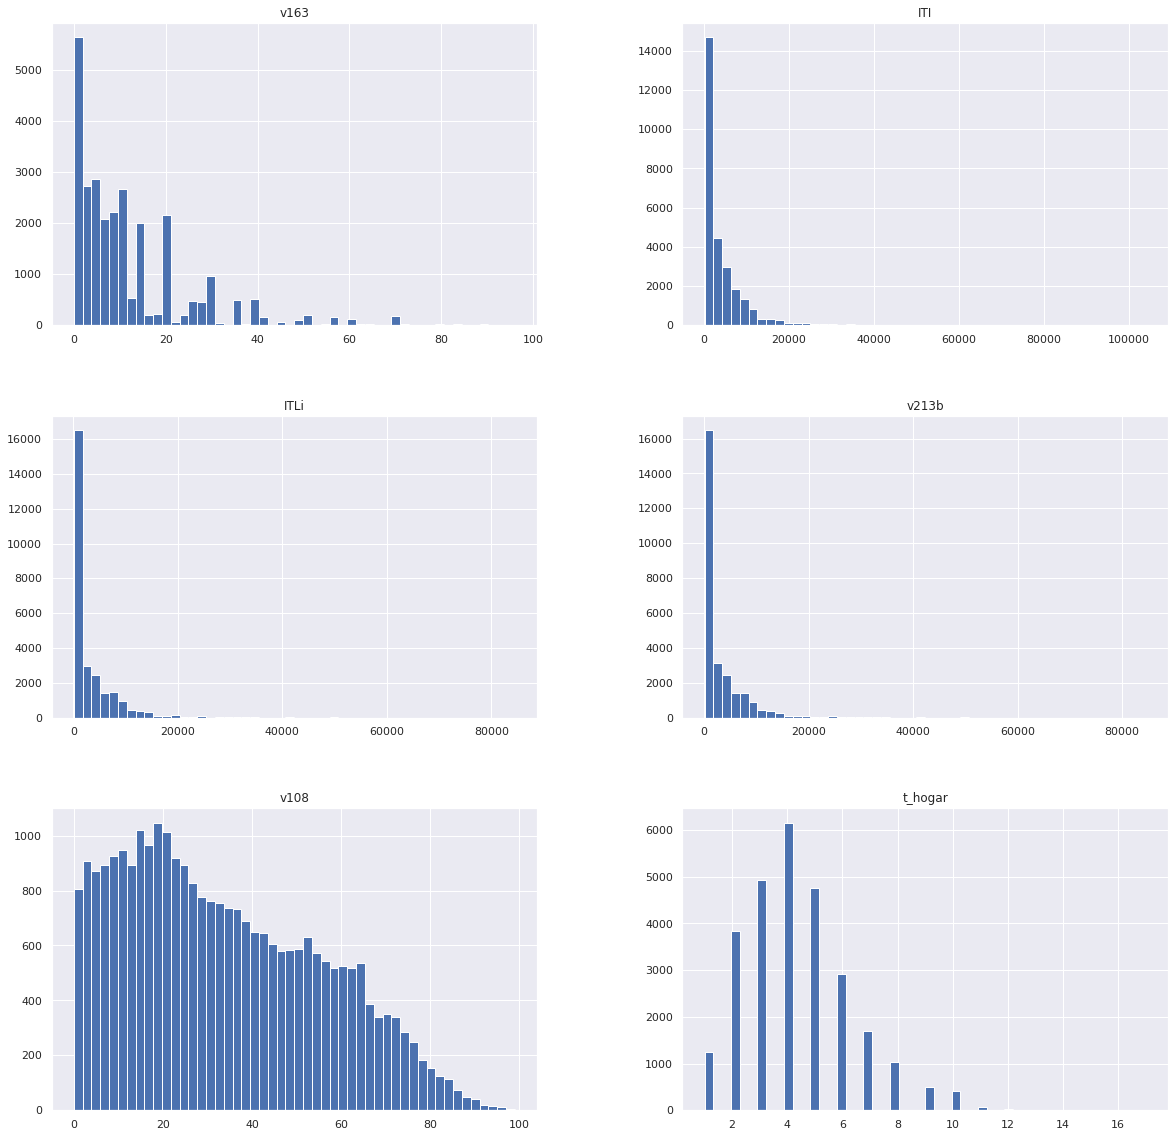

In [34]:
data[['v163','ITI','ITLi','v213b','v108','t_hogar']].hist(bins=50,figsize=(20,20));

# Analisis de proceso jerarquico


In [173]:
data_cluster=data_cluster2

In [174]:
data_cluster=data_cluster[data_cluster['v111']<3]

In [176]:
data_cluster=data_cluster[data_cluster['nivel_ed']>=7]

In [178]:
data_cluster=data_cluster[data_cluster['nivel_ed']<=10]

In [183]:
data_cluster

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0
0,1.0,56.0,1.0,8.0,4500.000000,4500.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2.0,51.0,2.0,7.0,4000.000000,4000.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
35,1.0,40.0,1.0,8.0,9000.000000,9000.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
36,2.0,36.0,2.0,9.0,4200.000000,4200.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
42,1.0,47.0,1.0,9.0,8000.000000,6000.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27517,2.0,42.0,1.0,8.0,49016.000000,49016.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0
27522,1.0,23.0,1.0,9.0,13859.000000,10141.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0
27523,2.0,24.0,2.0,9.0,1690.000000,1690.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
27568,2.0,27.0,2.0,7.0,95.613105,768.291308,2.0,1.0,0.0,0.0,1.0,0.0,0.0


In [219]:
data_cluster['estado'].unique().mean()

2.0

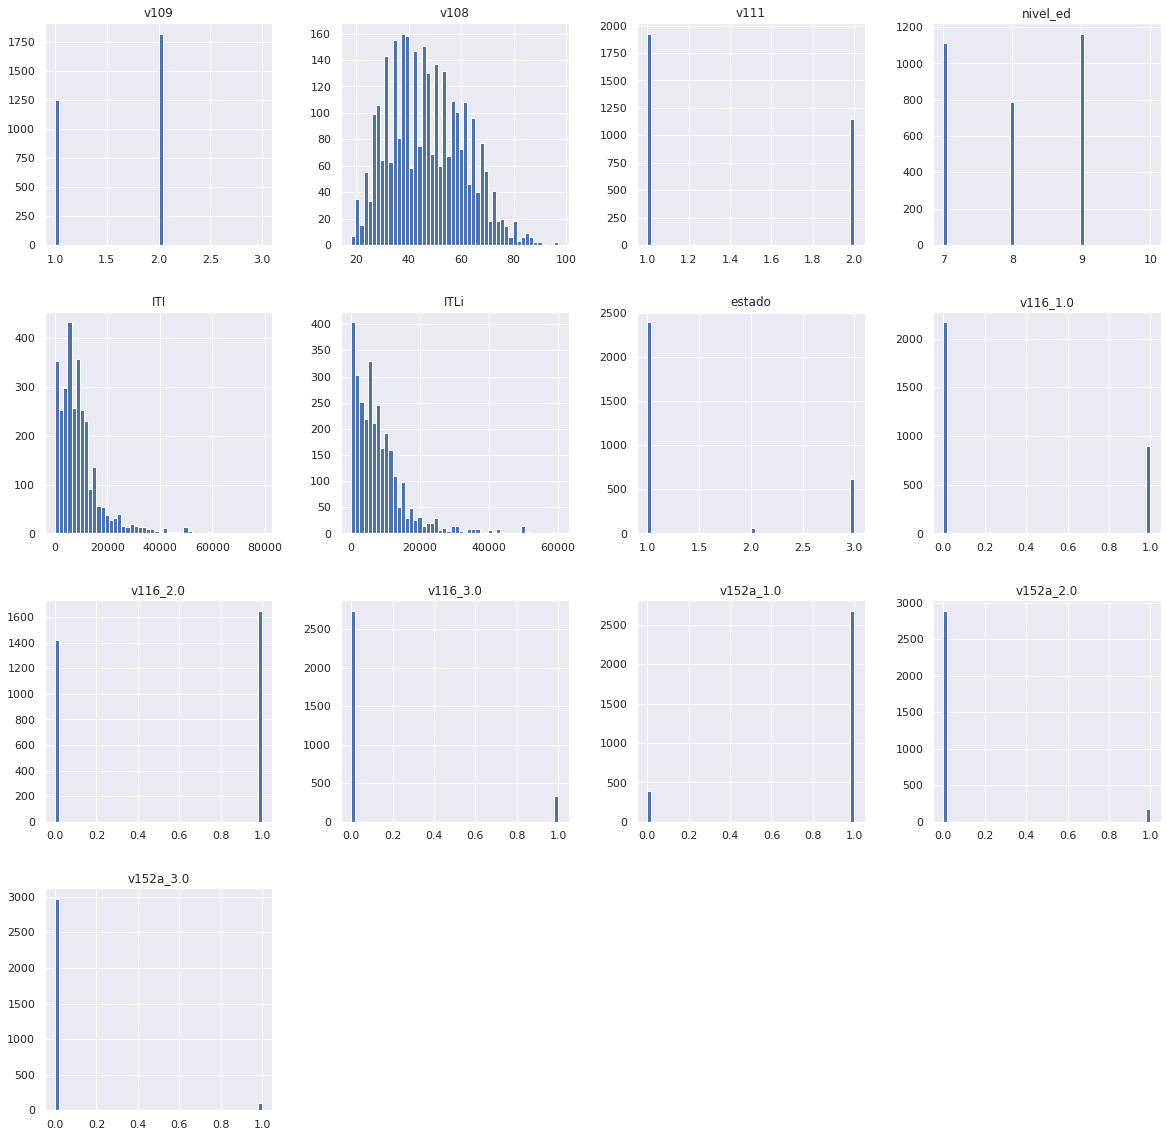

In [184]:
data_cluster[['v109', 'v108', 'v111', 'nivel_ed', 'ITI', 'ITLi', 'estado', 'v116_1.0','v116_2.0', 'v116_3.0', 'v152a_1.0', 'v152a_2.0', 'v152a_3.0']].hist(bins=50,figsize=(20,20));

In [186]:
data_cluster.describe()

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,1.592773,46.798177,1.373047,8.021484,9369.010897,8132.536250,1.421875,0.293620,0.537435,0.107422,0.872396,0.059245,0.033529
std,0.492060,14.363074,0.483693,0.867027,8525.086194,7889.713436,0.803616,0.455494,0.498678,0.309699,0.333703,0.236121,0.180042
min,1.000000,18.000000,1.000000,7.000000,83.578016,97.805389,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,35.000000,1.000000,7.000000,4000.000000,2844.556490,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,45.000000,1.000000,8.000000,7386.000000,6291.636892,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,57.000000,2.000000,9.000000,12000.000000,10551.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,97.000000,2.000000,10.000000,79000.000000,60000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlacion

In [187]:
data_cluster.corr()

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0
v109,1.000000,-0.056739,0.408640,-0.110766,-0.208938,-0.225752,0.148034,0.025161,-0.083164,0.024327,0.024525,-0.022098,-0.011231
v108,-0.056739,1.000000,-0.088291,0.033792,0.122343,-0.011743,0.352686,-0.414155,0.190315,0.111680,0.227109,-0.199737,-0.139674
v111,0.408640,-0.088291,1.000000,-0.036199,-0.239998,-0.190783,0.128617,-0.107136,0.283632,-0.189346,0.008542,-0.013955,-0.001585
nivel_ed,-0.110766,0.033792,-0.036199,1.000000,0.168870,0.180001,-0.067692,-0.015978,0.037302,-0.011023,0.000475,-0.009401,0.009986
ITI,-0.208938,0.122343,-0.239998,0.168870,1.000000,0.899783,-0.231927,-0.071732,0.020797,0.065813,0.040638,-0.034748,0.003920
ITLi,-0.225752,-0.011743,-0.190783,0.180001,0.899783,1.000000,-0.422097,-0.056495,0.054768,0.043637,0.036028,-0.019538,0.001560
estado,0.148034,0.352686,0.128617,-0.067692,-0.231927,-0.422097,1.000000,-0.078756,0.018270,-0.043462,0.002884,-0.035662,0.010233
v116_1.0,0.025161,-0.414155,-0.107136,-0.015978,-0.071732,-0.056495,-0.078756,1.000000,-0.694944,-0.223664,-0.145464,0.113722,0.134039
v116_2.0,-0.083164,0.190315,0.283632,0.037302,0.020797,0.054768,0.018270,-0.694944,1.000000,-0.373938,0.108942,-0.087978,-0.088334
v116_3.0,0.024327,0.111680,-0.189346,-0.011023,0.065813,0.043637,-0.043462,-0.223664,-0.373938,1.000000,0.028702,-0.015811,-0.029576


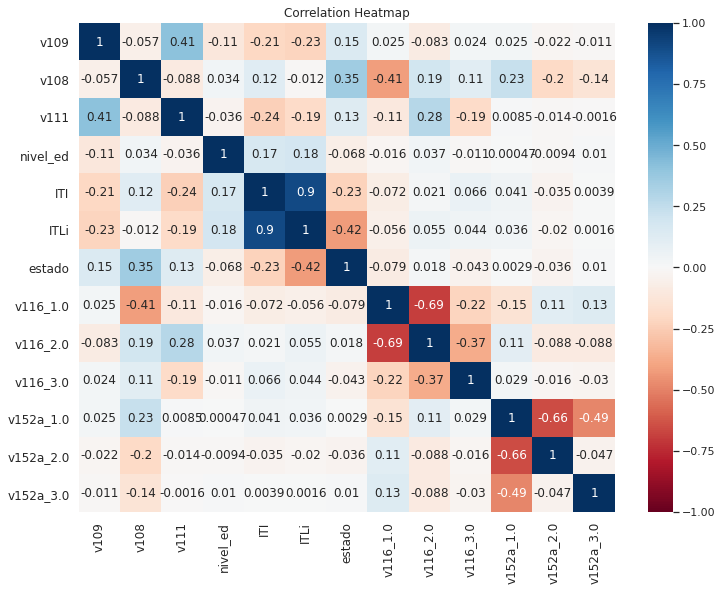

In [188]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(data_cluster.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

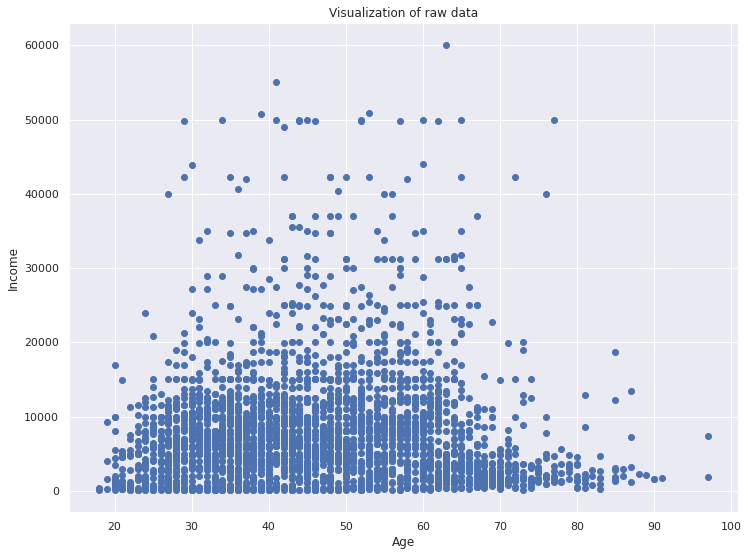

In [189]:
plt.figure(figsize = (12, 9))
plt.scatter(data_cluster.iloc[:, 1], data_cluster.iloc[:, 5])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data');

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler, normalize

In [191]:
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)

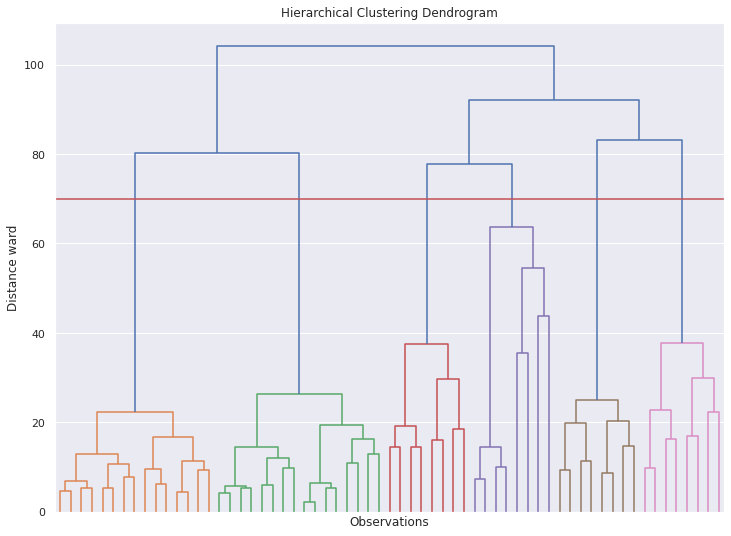

In [193]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance ward')
dendrogram(linkage(data_cluster_scaled, method = 'ward'),
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.axhline(70, c='r')
plt.show()

Se observa que el corte intersecta con 6 líneas verticales, esto significa que vamos a utilizar el método de clustering jerárquico de sklearn con n_clusters=6

In [194]:
from sklearn.cluster import AgglomerativeClustering

In [195]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

# Lo ajustamos con los datos
cluster.fit_predict(data_cluster_scaled)

array([0, 0, 0, ..., 0, 1, 2])

Text(0, 0.5, 'Ingreso neto en ocupacion principal')

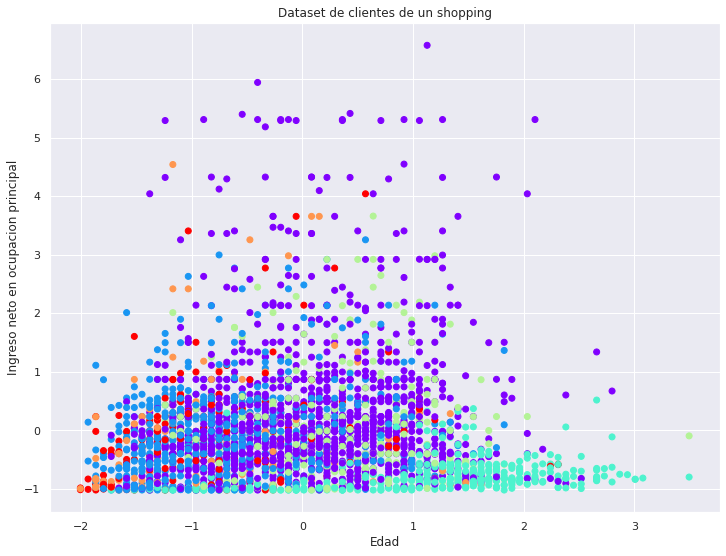

In [209]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(12, 9))
plt.title("Dataset de clientes de un shopping")
plt.scatter(x=data_cluster_scaled[:,1], y=data_cluster_scaled[:,5], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Edad")
plt.ylabel("Ingreso neto en ocupacion principal")

## Analisis con kmeans

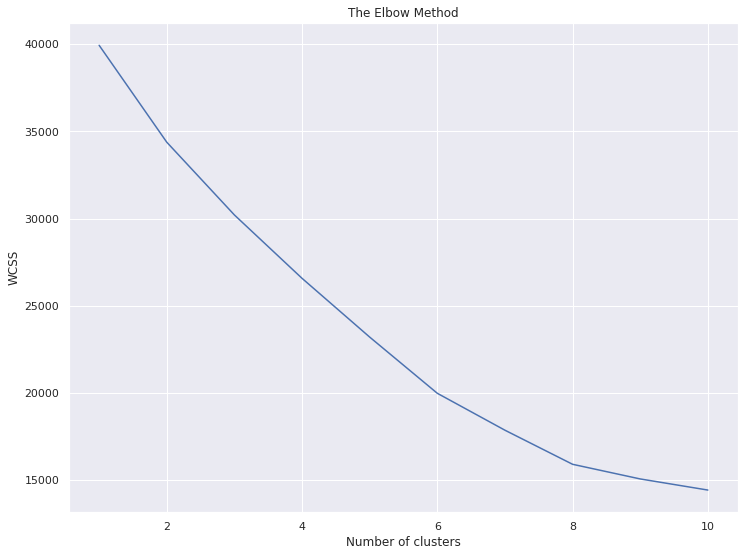

In [197]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [198]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(data_cluster_scaled)

In [211]:
kmeans.labels_

array([1, 2, 1, ..., 2, 4, 2], dtype=int32)

In [199]:
y_kmeans

array([1, 2, 1, ..., 2, 4, 2], dtype=int32)

In [200]:
data_cluster['pred']=y_kmeans

In [220]:
data_cluster.describe()

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0,pred
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,1.592773,46.798177,1.373047,8.021484,9369.010897,8132.536250,1.421875,0.293620,0.537435,0.107422,0.872396,0.059245,0.033529,2.253906
std,0.492060,14.363074,0.483693,0.867027,8525.086194,7889.713436,0.803616,0.455494,0.498678,0.309699,0.333703,0.236121,0.180042,1.446760
min,1.000000,18.000000,1.000000,7.000000,83.578016,97.805389,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,35.000000,1.000000,7.000000,4000.000000,2844.556490,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,2.000000,45.000000,1.000000,8.000000,7386.000000,6291.636892,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,2.000000,57.000000,2.000000,9.000000,12000.000000,10551.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000
max,3.000000,97.000000,2.000000,10.000000,79000.000000,60000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [202]:
data_cluster.groupby(['pred']).mean()

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0
pred,,,,,,,,,,,,,
0,1.637255,51.601307,1.107843,8.009804,10687.759564,8761.122503,1.336601,0.000000,0.000000,1.000000,0.964052,0.0,0.0
1,1.193103,49.594483,1.078621,8.241379,15773.896808,14537.814446,1.046897,0.034483,0.893793,0.002759,0.961379,0.0,0.0
2,1.840509,52.343444,1.725049,7.919765,5834.735745,4415.498214,1.825832,0.002935,0.886497,0.000000,0.960861,0.0,0.0
3,1.563107,36.029126,1.368932,8.067961,9548.411587,8198.603509,1.466019,0.621359,0.300971,0.058252,0.000000,0.0,1.0
4,1.638965,38.658038,1.291553,7.952316,7681.376429,6862.251980,1.287466,0.979564,0.000000,0.000000,0.961853,0.0,0.0
5,1.549451,35.368132,1.346154,7.989011,8188.765055,7518.374240,1.307692,0.500000,0.362637,0.087912,0.000000,1.0,0.0


In [205]:
X = data_cluster.iloc[:, :13].values

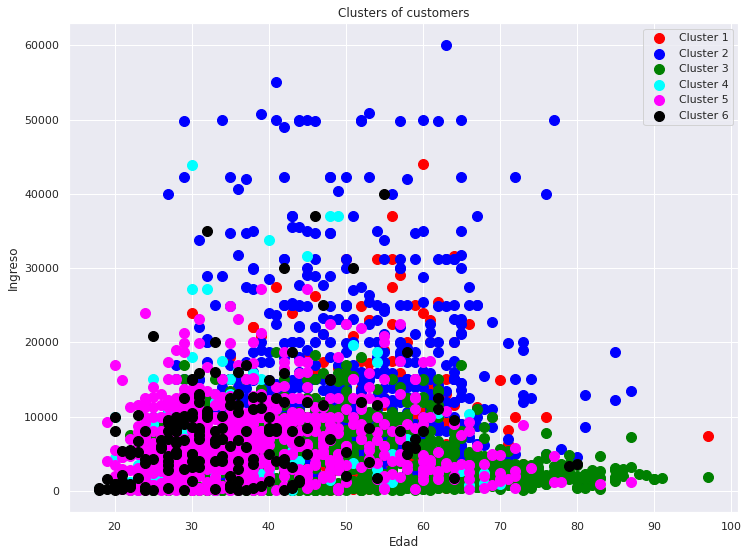

In [208]:
# Visualizacion grafica de los clusters
plt.figure(figsize=(12, 9))
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 5], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 5], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,1], X[y_kmeans == 2, 5], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 5], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,1 ], X[y_kmeans == 4, 5], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 1], X[y_kmeans == 5, 5], s = 100, c = 'black', label = 'Cluster 6')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 5], s = 300, c = 'yellow', label = 'Centroids')


plt.title('Clusters of customers')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.legend()
plt.show()

## Resultados

In [212]:
data_segm_kmeans=data_cluster.copy()
data_segm_kmeans['segment_k-means']=kmeans.labels_

In [213]:
data_segm_analysis=data_segm_kmeans.groupby(['segment_k-means']).mean()
data_segm_analysis

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0,pred
segment_k-means,,,,,,,,,,,,,,
0,1.637255,51.601307,1.107843,8.009804,10687.759564,8761.122503,1.336601,0.000000,0.000000,1.000000,0.964052,0.0,0.0,0.0
1,1.193103,49.594483,1.078621,8.241379,15773.896808,14537.814446,1.046897,0.034483,0.893793,0.002759,0.961379,0.0,0.0,1.0
2,1.840509,52.343444,1.725049,7.919765,5834.735745,4415.498214,1.825832,0.002935,0.886497,0.000000,0.960861,0.0,0.0,2.0
3,1.563107,36.029126,1.368932,8.067961,9548.411587,8198.603509,1.466019,0.621359,0.300971,0.058252,0.000000,0.0,1.0,3.0
4,1.638965,38.658038,1.291553,7.952316,7681.376429,6862.251980,1.287466,0.979564,0.000000,0.000000,0.961853,0.0,0.0,4.0
5,1.549451,35.368132,1.346154,7.989011,8188.765055,7518.374240,1.307692,0.500000,0.362637,0.087912,0.000000,1.0,0.0,5.0


## interpretacion

nterpretacion:
 El primer grupo se caracteriza porque tiene mas mujeres  que hombres, la edad promedio es de 51 años, tienen  el nivel de educaion cercano a universitario incompleto, su situacion laboral empleado, tienen los ingresos ligeramente mayor al promedio se encuentran divorsiados o separados y viven en la localidad -->podemos llamar a este grupo como **capacida gasto promedio muy alto**
 El segundo grupo en su mayoria son varones, la edad promedio es 49 años, son los que sostiene la familia , su nivel de educacion es mayor universitario casi completo , tienen mejores ingreso mayor que el promedio , su condicion de actividad es empleado, se encuentran casados y viven su localidad --> podemos llamar a este grupo como  **capacidad de gasto Superior**
 El tercer grupo  mayor cantidad son mujeres, la edad promedio de 52 años ,son conyugues, no son el  sosten de hogar, nivel de educacion universitario incompleto, ingresos muy bajos menor al promedio,situacion desempleado se encuntran con estado civil casados y viven en la misma localidad --> podemos llamar a este grupo como **capacidad de gasto muy bajo**
El cuarto grupo mayor cantidad de mujeres, edad promedio 36 años,no son el soten de familia, nivel de educacion universitario ingreso promedio, situacion laboral ocupado, medianamente  solteros y viven la misma localidad-->podemos llamar a este grupo como **capacidad de gato promedio alto**
El quinto  grupo  en su mayoria mujeres , edad promedio de 38 años ,medianamente son el  sonten de familia, nivel de educacion terciario completo  ingresos menor al promedio,  medianamente ocupado y solteros viven en la misma localidad --> podemos llamar a este grupo  **capacidad de gasto bajo**
El sexto grupo  son mujeres en su mayoria,  edad de 35 años, medianamente son el sosten de familia, nivel de educacion universitario incompleto, ingresos  promedio, estado laboral medianamente ocupado, solteros y divorciados viven en otra localidad --> podemos llamar a este grupo como **capacidad de gasto promedio**

In [221]:
data_segm_analysis['N_obs']=data_segm_kmeans[['segment_k-means','v109']].groupby(['segment_k-means']).count()

In [222]:
data_segm_analysis['Prop_obs']=data_segm_analysis['N_obs']/data_segm_analysis['N_obs'].sum()

In [223]:
data_segm_analysis

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0,pred,N_obs,Prop_obs
segment_k-means,,,,,,,,,,,,,,,,
0,1.637255,51.601307,1.107843,8.009804,10687.759564,8761.122503,1.336601,0.000000,0.000000,1.000000,0.964052,0.0,0.0,0.0,306,0.099609
1,1.193103,49.594483,1.078621,8.241379,15773.896808,14537.814446,1.046897,0.034483,0.893793,0.002759,0.961379,0.0,0.0,1.0,725,0.236003
2,1.840509,52.343444,1.725049,7.919765,5834.735745,4415.498214,1.825832,0.002935,0.886497,0.000000,0.960861,0.0,0.0,2.0,1022,0.332682
3,1.563107,36.029126,1.368932,8.067961,9548.411587,8198.603509,1.466019,0.621359,0.300971,0.058252,0.000000,0.0,1.0,3.0,103,0.033529
4,1.638965,38.658038,1.291553,7.952316,7681.376429,6862.251980,1.287466,0.979564,0.000000,0.000000,0.961853,0.0,0.0,4.0,734,0.238932
5,1.549451,35.368132,1.346154,7.989011,8188.765055,7518.374240,1.307692,0.500000,0.362637,0.087912,0.000000,1.0,0.0,5.0,182,0.059245


In [224]:
data_segm_analysis.rename({0:'cap_gasto_prom_muy_alto',
                           1:'cap_gasto_Superior',
                           2:'cap_gasto_muy_bajo',
                           3:'cap_gasto_prom_alto',
                           4:'cap_gasto_bajo',
                           5:'cap_gasto_prom'})

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0,pred,N_obs,Prop_obs
segment_k-means,,,,,,,,,,,,,,,,
cap_gasto_prom_muy_alto,1.637255,51.601307,1.107843,8.009804,10687.759564,8761.122503,1.336601,0.000000,0.000000,1.000000,0.964052,0.0,0.0,0.0,306,0.099609
cap_gasto_Superior,1.193103,49.594483,1.078621,8.241379,15773.896808,14537.814446,1.046897,0.034483,0.893793,0.002759,0.961379,0.0,0.0,1.0,725,0.236003
cap_gasto_muy_bajo,1.840509,52.343444,1.725049,7.919765,5834.735745,4415.498214,1.825832,0.002935,0.886497,0.000000,0.960861,0.0,0.0,2.0,1022,0.332682
cap_gasto_prom_alto,1.563107,36.029126,1.368932,8.067961,9548.411587,8198.603509,1.466019,0.621359,0.300971,0.058252,0.000000,0.0,1.0,3.0,103,0.033529
cap_gasto_bajo,1.638965,38.658038,1.291553,7.952316,7681.376429,6862.251980,1.287466,0.979564,0.000000,0.000000,0.961853,0.0,0.0,4.0,734,0.238932
cap_gasto_prom,1.549451,35.368132,1.346154,7.989011,8188.765055,7518.374240,1.307692,0.500000,0.362637,0.087912,0.000000,1.0,0.0,5.0,182,0.059245


In [225]:
data_segm_kmeans['Labels']=data_segm_kmeans['segment_k-means'].map({0:'cap_gasto_prom_muy_alto',
                                                                   1:'cap_gasto_Superior',
                                                                   2:'cap_gasto_muy_bajo',
                                                                   3:'cap_gasto_prom_alto',
                                                                   4:'cap_gasto_bajo',
                                                                   5:'cap_gasto_prom'})

/home/jpr/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


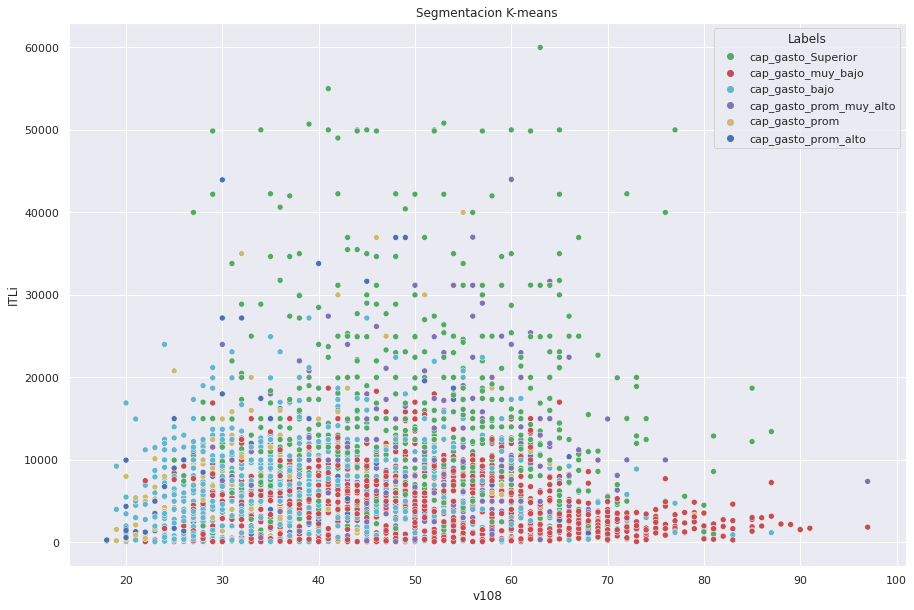

In [232]:
x_axis=data_segm_kmeans['v108']
y_axis=data_segm_kmeans['ITLi']
plt.figure(figsize=(15,10))
sns.scatterplot(x_axis,y_axis, hue=data_segm_kmeans['Labels'], palette=['g','r','c','m','y','b'])
plt.title('Segmentacion K-means')
plt.show()

# PCA

In [267]:
pca=PCA()

In [268]:
pca.fit(data_cluster_scaled)

PCA()

In [269]:
pca.explained_variance_ratio_

array([0.18540593, 0.17762216, 0.12277068, 0.10556989, 0.08583408,
       0.08268199, 0.07388947, 0.06929007, 0.03865663, 0.03341612,
       0.01226042, 0.00694711, 0.00565546])

Text(0, 0.5, 'Cumulative Explained Variance')

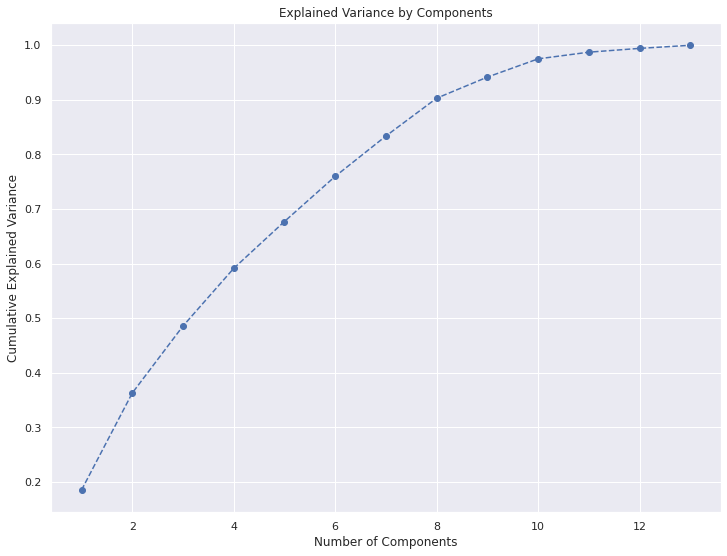

In [270]:
plt.figure(figsize=(12,9))
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [271]:
pca=PCA(n_components=6)

In [272]:
pca.fit(data_cluster_scaled)

PCA(n_components=6)

# PCA RESULTS

In [273]:
pca.components_

array([[-0.30960579,  0.07540184, -0.29742014,  0.18990336,  0.55715504,
         0.57328833, -0.30861702, -0.09672978,  0.03643303,  0.10197131,
         0.10206704, -0.07507276, -0.04975243],
       [-0.04894942, -0.40139363, -0.15999359,  0.00127403,  0.02343688,
         0.06106147, -0.19631354,  0.47170385, -0.42146642,  0.01807223,
        -0.42596957,  0.34072488,  0.26469256],
       [-0.02999112, -0.0911627 ,  0.30856034,  0.0981292 ,  0.0824354 ,
         0.12982771, -0.06801124, -0.28372554,  0.54162114, -0.36838965,
        -0.42593943,  0.34544115,  0.21761471],
       [-0.21559045,  0.43631127, -0.3324759 , -0.01231739, -0.01642042,
        -0.13490831,  0.36259576, -0.29404812, -0.06770992,  0.41688567,
        -0.35909488,  0.28606511,  0.16398401],
       [ 0.59684609, -0.06798771,  0.34833163, -0.1280795 ,  0.168942  ,
         0.19771393, -0.16425814, -0.23410533, -0.11739475,  0.54884625,
        -0.07046563,  0.15673421, -0.08631419],
       [ 0.22818708,  0.155782

In [248]:
data_cluster.drop(columns='pred', inplace=True)

In [274]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data_cluster.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6'])
df_pca_comp

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0
Component 1,-0.309606,0.075402,-0.297420,0.189903,0.557155,0.573288,-0.308617,-0.096730,0.036433,0.101971,0.102067,-0.075073,-0.049752
Component 2,-0.048949,-0.401394,-0.159994,0.001274,0.023437,0.061061,-0.196314,0.471704,-0.421466,0.018072,-0.425970,0.340725,0.264693
Component 3,-0.029991,-0.091163,0.308560,0.098129,0.082435,0.129828,-0.068011,-0.283726,0.541621,-0.368390,-0.425939,0.345441,0.217615
Component 4,-0.215590,0.436311,-0.332476,-0.012317,-0.016420,-0.134908,0.362596,-0.294048,-0.067710,0.416886,-0.359095,0.286065,0.163984
Component 5,0.596846,-0.067988,0.348332,-0.128079,0.168942,0.197714,-0.164258,-0.234105,-0.117395,0.548846,-0.070466,0.156734,-0.086314
Component 6,0.228187,0.155783,0.154197,0.202329,0.187988,0.112084,0.260142,0.104216,-0.101037,-0.037978,-0.052211,-0.473612,0.702728


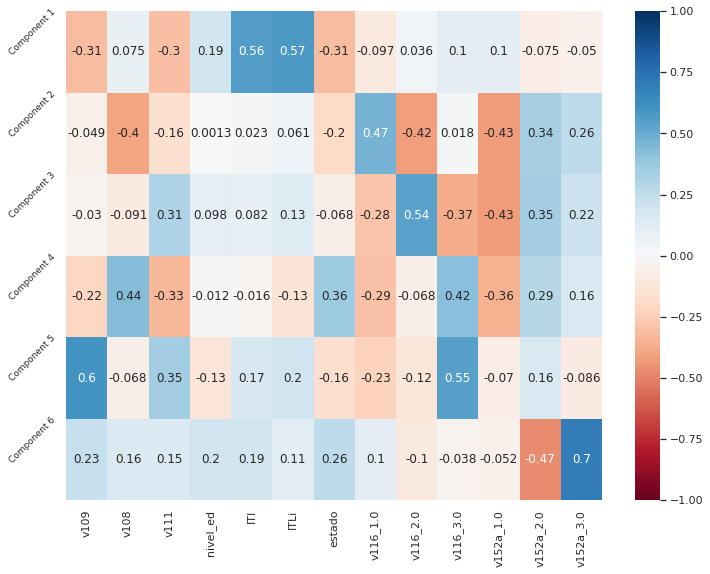

In [276]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True
           )
plt.yticks([0, 1, 2,3,4,5], 
           ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6'],
           rotation = 45,
           fontsize = 9)
plt.show()

In [277]:
pca.transform(data_cluster_scaled)

array([[ 0.35377963, -1.01238249,  0.18919381,  0.4196914 , -1.32809913,
        -0.77441629],
       [-1.20485718, -1.30966703,  0.67174166, -0.83418808,  0.75429572,
        -0.29752885],
       [ 0.89095073, -0.51796405,  0.40834454, -0.15205257, -1.05037243,
        -0.78479634],
       ...,
       [-1.22736698, -0.57628942,  1.00917504, -1.63897015,  0.48294577,
        -0.20739301],
       [-2.49051129,  0.96213444, -1.06078727, -1.55915573,  0.22650895,
         0.06533941],
       [-0.93167864, -2.45450422,  0.48364905,  0.78735821,  0.50582192,
         0.9188051 ]])

In [278]:
scores_pca=pca.transform(data_cluster_scaled)

# K_means clustering whit PCA

In [279]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

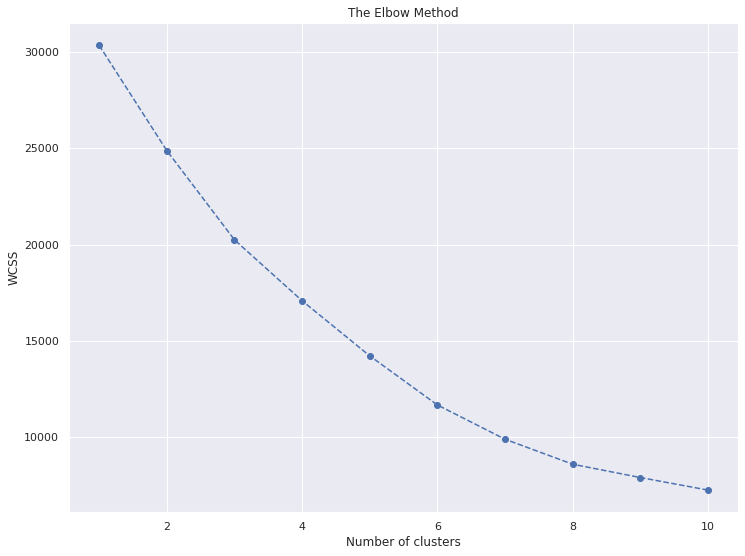

In [280]:
# Grafica de la suma de las distancias
plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), wcss, marker='o',linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [281]:
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
kmeans_pca.fit(data_cluster_scaled)

KMeans(n_clusters=6, random_state=42)

In [284]:
data_segm_pca_kmeans=pd.concat([data_cluster.reset_index(drop=True),pd.DataFrame(scores_pca)],axis= 1)
data_segm_pca_kmeans.columns.values[-6:]= ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6']
data_segm_pca_kmeans['Segment_k_means_PCA']= kmeans_pca.labels_

In [285]:
data_segm_pca_kmeans

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment_k_means_PCA
0,1.0,56.0,1.0,8.0,4500.000000,4500.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.353780,-1.012382,0.189194,0.419691,-1.328099,-0.774416,1
1,2.0,51.0,2.0,7.0,4000.000000,4000.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.204857,-1.309667,0.671742,-0.834188,0.754296,-0.297529,2
2,1.0,40.0,1.0,8.0,9000.000000,9000.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.890951,-0.517964,0.408345,-0.152053,-1.050372,-0.784796,1
3,2.0,36.0,2.0,9.0,4200.000000,4200.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.817880,-0.885368,0.998583,-1.322145,0.538793,0.013802,2
4,1.0,47.0,1.0,9.0,8000.000000,6000.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.577911,1.142940,-1.291229,-0.410216,-1.604863,-0.108667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,2.0,42.0,1.0,8.0,49016.000000,49016.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.510486,1.627479,-0.329010,-1.800805,1.670799,1.583307,1
3068,1.0,23.0,1.0,9.0,13859.000000,10141.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.797381,2.700809,3.435065,1.576351,-0.117638,-2.462080,5
3069,2.0,24.0,2.0,9.0,1690.000000,1690.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.227367,-0.576289,1.009175,-1.638970,0.482946,-0.207393,2
3070,2.0,27.0,2.0,7.0,95.613105,768.291308,2.0,1.0,0.0,0.0,1.0,0.0,0.0,-2.490511,0.962134,-1.060787,-1.559156,0.226509,0.065339,4


In [286]:
data_segm_pca_kmeans_freq=data_segm_pca_kmeans.groupby(['Segment_k_means_PCA']).mean()
data_segm_pca_kmeans_freq

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,v152a_1.0,v152a_2.0,v152a_3.0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
Segment_k_means_PCA,,,,,,,,,,,,,,,,,,,
0,1.637255,51.601307,1.107843,8.009804,10687.759564,8761.122503,1.336601,0.000000,0.000000,1.000000,0.964052,0.0,0.0,0.695578,-0.071182,-1.880433,1.520433,1.718192,-0.098277
1,1.193103,49.594483,1.078621,8.241379,15773.896808,14537.814446,1.046897,0.034483,0.893793,0.002759,0.961379,0.0,0.0,1.625565,-0.606010,0.475004,-0.051806,-0.556768,-0.231365
2,1.840509,52.343444,1.725049,7.919765,5834.735745,4415.498214,1.825832,0.002935,0.886497,0.000000,0.960861,0.0,0.0,-0.914820,-1.283594,0.481143,-0.129843,0.131952,0.113618
3,1.563107,36.029126,1.368932,8.067961,9548.411587,8198.603509,1.466019,0.621359,0.300971,0.058252,0.000000,0.0,1.0,-0.643825,3.281472,1.864716,1.208291,-0.517097,4.055344
4,1.638965,38.658038,1.291553,7.952316,7681.376429,6862.251980,1.287466,0.979564,0.000000,0.000000,0.961853,0.0,0.0,-0.352713,1.177635,-1.161593,-0.959369,-0.450331,0.045223
5,1.549451,35.368132,1.346154,7.989011,8188.765055,7518.374240,1.307692,0.500000,0.362637,0.087912,0.000000,1.0,0.0,-0.721045,3.135145,2.196976,1.564449,0.696915,-2.028571


In [287]:
data_segm_pca_kmeans_freq['N_obs']=data_segm_pca_kmeans[['Segment_k_means_PCA','v109']].groupby(['Segment_k_means_PCA']).count()

data_segm_pca_kmeans_freq['Prop_obs']=data_segm_pca_kmeans_freq['N_obs']/data_segm_pca_kmeans_freq['N_obs'].sum()
data_segm_pca_kmeans_freq=data_segm_pca_kmeans_freq.rename({0:'cap_gasto_prom_muy_alto',
                                                               1:'cap_gasto_Superior',
                                                               2:'cap_gasto_muy_bajo',
                                                               3:'cap_gasto_prom_alto',
                                                               4:'cap_gasto_bajo',
                                                               5:'cap_gasto_prom'})

In [288]:
data_segm_pca_kmeans_freq

,v109,v108,v111,nivel_ed,ITI,ITLi,estado,v116_1.0,v116_2.0,v116_3.0,...,v152a_2.0,v152a_3.0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,N_obs,Prop_obs
Segment_k_means_PCA,,,,,,,,,,,,,,,,,,,,,
cap_gasto_prom_muy_alto,1.637255,51.601307,1.107843,8.009804,10687.759564,8761.122503,1.336601,0.000000,0.000000,1.000000,...,0.0,0.0,0.695578,-0.071182,-1.880433,1.520433,1.718192,-0.098277,306,0.099609
cap_gasto_Superior,1.193103,49.594483,1.078621,8.241379,15773.896808,14537.814446,1.046897,0.034483,0.893793,0.002759,...,0.0,0.0,1.625565,-0.606010,0.475004,-0.051806,-0.556768,-0.231365,725,0.236003
cap_gasto_muy_bajo,1.840509,52.343444,1.725049,7.919765,5834.735745,4415.498214,1.825832,0.002935,0.886497,0.000000,...,0.0,0.0,-0.914820,-1.283594,0.481143,-0.129843,0.131952,0.113618,1022,0.332682
cap_gasto_prom_alto,1.563107,36.029126,1.368932,8.067961,9548.411587,8198.603509,1.466019,0.621359,0.300971,0.058252,...,0.0,1.0,-0.643825,3.281472,1.864716,1.208291,-0.517097,4.055344,103,0.033529
cap_gasto_bajo,1.638965,38.658038,1.291553,7.952316,7681.376429,6862.251980,1.287466,0.979564,0.000000,0.000000,...,0.0,0.0,-0.352713,1.177635,-1.161593,-0.959369,-0.450331,0.045223,734,0.238932
cap_gasto_prom,1.549451,35.368132,1.346154,7.989011,8188.765055,7518.374240,1.307692,0.500000,0.362637,0.087912,...,1.0,0.0,-0.721045,3.135145,2.196976,1.564449,0.696915,-2.028571,182,0.059245


In [289]:
data_segm_pca_kmeans['Legend']=data_segm_pca_kmeans['Segment_k_means_PCA'].map({0:'cap_gasto_prom_muy_alto',
                                                               1:'cap_gasto_Superior',
                                                               2:'cap_gasto_muy_bajo',
                                                               3:'cap_gasto_prom_alto',
                                                               4:'cap_gasto_bajo',
                                                               5:'cap_gasto_prom'})

/home/jpr/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


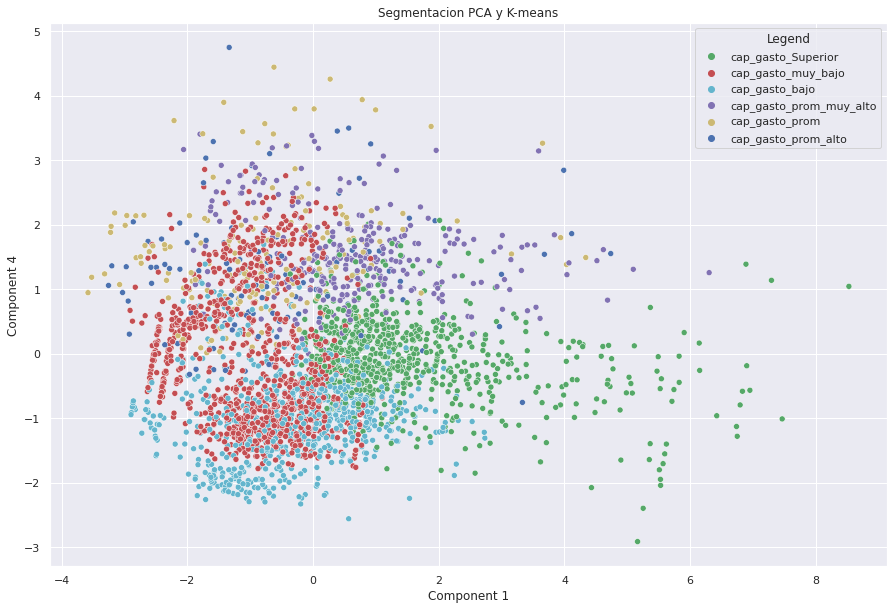

In [299]:
x_axis=data_segm_pca_kmeans['Component 1']
y_axis=data_segm_pca_kmeans['Component 4']
plt.figure(figsize=(15,10))
sns.scatterplot(x_axis,y_axis, hue=data_segm_pca_kmeans['Legend'], palette=['g','r','c','m','y','b'])
plt.title('Segmentacion PCA y K-means')
plt.show()